<a href="https://colab.research.google.com/github/brandonlaxalt-max/warehouse-optimization-research/blob/main/Logistics_Analytics_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses Applied Mathematics (IQR) to identify shipping cost anomalies in logistics datasets.

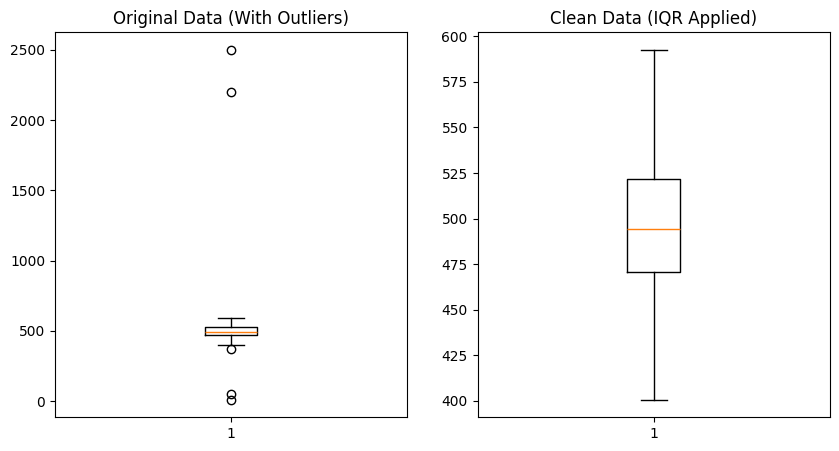

Removed 5 statistical anomalies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate "Messy" Logistics Data
np.random.seed(42)
data = {'shipping_cost': np.append(np.random.normal(500, 50, 100), [2500, 2200, 10, 50])}
df = pd.DataFrame(data)

# 2. Applied Math: IQR Calculation
Q1 = df['shipping_cost'].quantile(0.25)
Q3 = df['shipping_cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the "Fences"
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter Outliers
df_clean = df[(df['shipping_cost'] >= lower_bound) & (df['shipping_cost'] <= upper_bound)]

# 4. Visualize the Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['shipping_cost'])
plt.title("Original Data (With Outliers)")

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['shipping_cost'])
plt.title("Clean Data (IQR Applied)")
plt.show()

print(f"Removed {len(df) - len(df_clean)} statistical anomalies.")